# KHUDA ML세션 2주차과제

##[문제 1] k-최근접 이웃 회귀


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
person_height = np.array([141, 141, 142, 142, 142, 142, 142, 150, 150, 150, 151, 154, 154, 155, 158, 160, 160, 161, 161, 161, 162, 163, 163, 163, 163, 164, 166, 167, 168, 169, 175, 177, 178, 178, 178, 179, 181, 182, 183, 183, 183, 186, 188, 190, 191, 191, 192, 192, 194, 196, 197, 197, 198, 199, 199])
person_weight = np.array([ 41,  43,  43, 45,  46,  48,  53,  53,  54,  54,  57,  57,  60,  63,  65,  68,  73,  74,  75,  78,  79,  80,  83,  83,  84,  86,  87,  89,  90,  92,  92,  93,  93,  99,  99,  99, 101, 101, 102, 104, 110, 110, 111, 112, 113, 117, 117, 117, 119, 120, 125, 130, 135, 145, 150])


In [3]:
# 데이터셋을 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(
    person_height, person_weight, random_state=42)

In [4]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [5]:
# 배열 (2,2)로 바꾸기
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [6]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(41, 1) (14, 1)


In [7]:
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [8]:
# 테스트 세트의 점수를 확인
knr.score(test_input, test_target)

0.9579861589622217

In [9]:
# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

4.07142857142857


#[문제2] 선형 회귀

In [10]:
lr = LinearRegression()
# 선형 회귀 모델 훈련을 훈련합니다
lr.fit(train_input, train_target)

LinearRegression()

In [11]:
# 200cm 사람에 대한 예측합니다
print(lr.predict([[200]]))

[133.83506941]


In [12]:
print(lr.coef_, lr.intercept_)

[1.53101509] -172.36794834996743


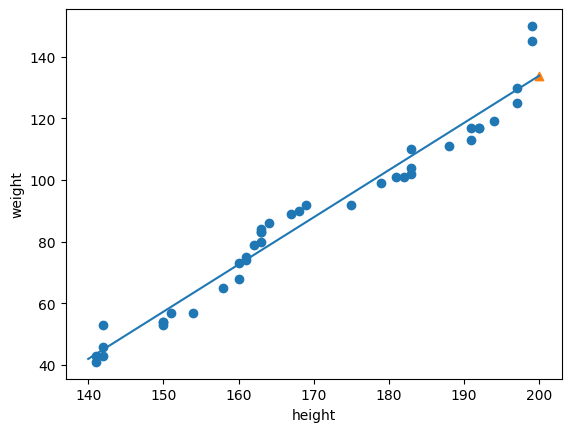

In [13]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 140에서 200까지 1차 방정식 그래프를 그립니다
plt.plot([140, 200], [140*lr.coef_+lr.intercept_, 200*lr.coef_+lr.intercept_])
# 200cm 사람 데이터
plt.scatter(200, 133.8, marker='^')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

In [14]:
# 훈련 세트 점수 출력하기
print(lr.score(train_input, train_target))
# 테스트 세트 점수 출력하기
print(lr.score(test_input, test_target))

0.9621117601088992
0.9709016545091074


### [생각해보기] 훈련 세트와 테스트 세트의 점수를 확인한 결과, 오버피팅인지 언더피팅인지 판단하시오.



#[문제3] 특성 공학과 규제

In [15]:
# 데이터 준비
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )
print(perch_full)
print(perch_weight)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [16]:
#데이터셋을 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_full,perch_weight,random_state=42)

In [17]:
#사이킷런의 변환기
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [18]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [19]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [20]:
test_poly = poly.transform(test_input)

In [21]:
# 다중 회귀 모델 훈련하기
lr = LinearRegression()

In [22]:
# 5제곱까지 특성으로 만들어 출력합니다
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [23]:
# 데이터를 사용해 선형 회귀 모델을 훈련합니다
lr.fit(train_poly, train_target)
#훈련 세트와 테스트 세트 점수 확인
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999996433
-144.40579436844948


In [24]:
# 규제를 하기 전에 정규화를 해야 합니다
ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [25]:
# 릿지
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [26]:
print(ridge.score(test_scaled, test_target))

0.9790693977615387


In [27]:
train_score = []
test_score = []

In [28]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha = alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

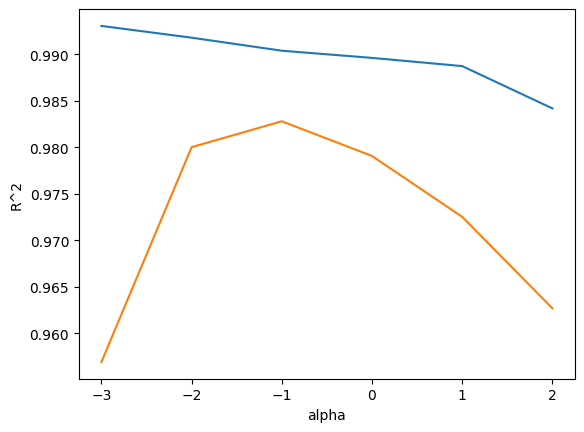

In [29]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

###[생각해보기] alpha 값 중에 제일 적절한 alpha 값을 찾고 이유도 적으시오.

In [30]:
# alpha 값을 0.1로 하여 최종 모델을 훈련합니다
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


# [생각해보기]
### 1. 회귀 알고리즘은 어떤 문제를 해결할 때 사용되는가?

### 2. 결정계수는 회귀에서 어떠한 의미를 가지며, 타깃의 어떠한 변화에 따라 0과 1에 각각 가까워지는가?

### 3. 과대적합과 과소적합은 어떠한 경우에 발생하며, 각각 이를 어떻게 해결해야하는가?

### 4. 훈련 세트 범위 밖의 샘플을 예측할 때에는 어떤 방법을 사용해야 하는가?

### 5. 릿지 회귀와 라쏘 회귀는 어떠한 점이 다른가? 일반적으로 릿지 회귀를 선호하지만 라쏘 회귀를 선호하는 경우는 어떤 경우일까?

[답]
1. 연속적인 값을 예측할 때 사용된다
2. 결정계수는 회귀에서 회귀모델의 성능을 판단할 때 사용된다. 예측한 값과 타깃의 값이 유사할수록 즉, 회귀모델의 성능이 좋을수록 1에 가깝다.
3. 과대적합은 모델이 train set에 과하게 fit하여 test set으로 평가했을때 점수가 낮게 나오는 경우이다. 모델의 복잡성을 줄여준다.
과소적합은 모델이 train set으로 잘 학습되지 않아 모델을 test set으로 평가했을 때, test set의 점수도 낮거나 test set의 점수만 높은 경우이다. 이 경우네느 feature을 높이는 등 모델의 복잡성을 높여준다.
4. 더이상 k-NN이 아닌 데이터의 경향을 통해 결과값을 예측하는 회귀분석을 사용했다.
5. 릿지 회귀는 계수를 제곱한 값을 기준으로 규제를 적용하고, 라쏘 회귀는 계쑤의 절댓값을 기준으로 규제를 적용한다.
라쏘 회귀는 릿지 회귀와 달리 계수를 0으로 만들 수 있기 때문에 계수를 0으로 만들어버리는 것이 효과적인 경우에 선호될 것 같다.